In [1]:
include("PVCR.jl");

# Residential cases

## Residential Case 1: Small PV System, this doesn't generate any injection into the grid

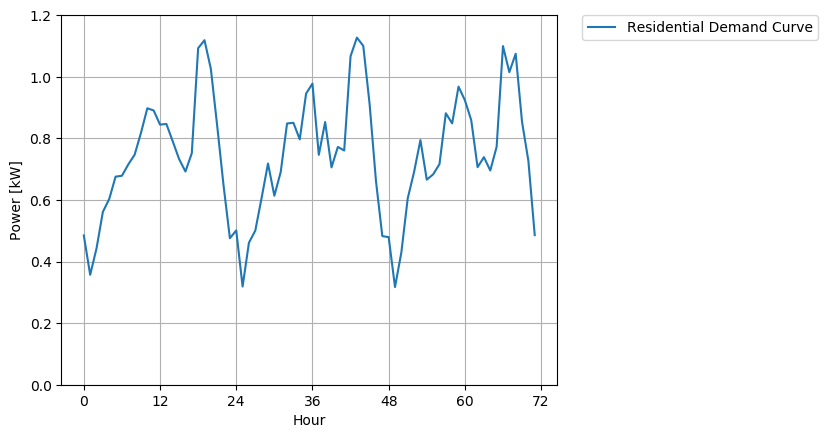

In [2]:
PVRes.capacity = 1.0
ts=simulate(residential, PVRes, 3);
plot(ts["demand_curve"], label = "Residential Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,1.2)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

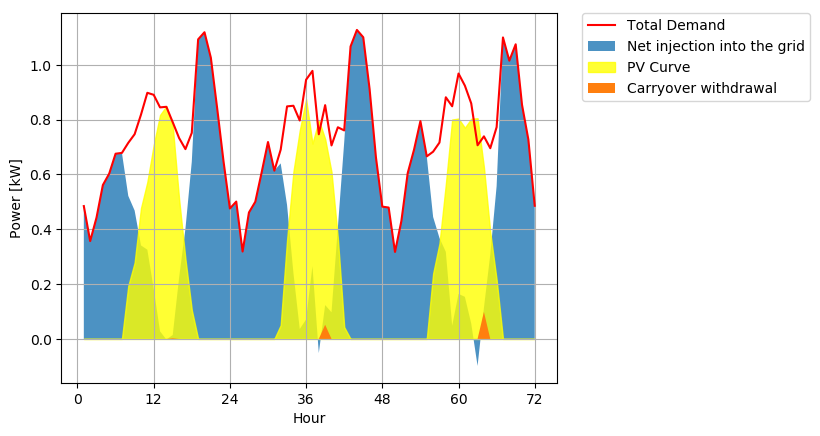

In [3]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 1

In [4]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 544.62 187.28  | 0.32 0.32 357.34  | 187.28 0.32 91.77 91.45 0.0 
2 544.81 126.55  | 0.0 0.0 418.25  | 313.84 0.32 153.78 153.46 0.0 
3 551.38 154.57  | 0.0 0.0 396.82  | 468.4 0.32 229.52 229.2 0.0 
4 542.13 165.13  | 0.12 0.12 377.0  | 633.53 0.44 310.43 309.99 0.0 
5 553.32 169.82  | 0.0 0.0 383.5  | 803.35 0.44 393.64 393.21 0.0 
6 558.5 167.25  | 0.11 0.11 391.25  | 970.6 0.55 475.6 475.05 0.0 
7 537.66 172.13  | 0.03 0.03 365.54  | 1142.73 0.58 559.94 559.36 0.0 
8 546.94 167.8  | 0.0 0.0 379.15  | 1310.53 0.58 642.16 641.58 0.0 
9 537.49 181.65  | 0.06 0.06 355.84  | 1492.17 0.64 731.17 730.53 0.0 
10 560.41 172.19  | 0.06 0.06 388.23  | 1664.36 0.7 815.54 814.84 0.0 
11 558.46 170.67  | 0.0 0.0 387.79  | 1835.03 0.7 899.16 898.47 0.0 
12 558.3 177.4  | 0.52 0.52 380.9  | 2012.43 1.22 986.09 984.87 0.0 


### Billings case residential 1

In [5]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
47429.1 6.69 0.0 55687.09  | 77857.23 22170.14
53528.71 0.0 0.0 62892.25  | 77878.95 14986.7
51382.41 0.0 0.0 60354.15  | 78657.95 18303.79
49398.22 2.49 0.0 58010.69  | 77562.55 19551.86
50048.76 0.0 0.0 58777.04  | 78887.25 20110.21
50824.87 2.3 0.0 59697.56  | 79500.63 19803.07
48249.79 0.68 0.0 56650.47  | 77033.09 20382.62
49612.61 0.0 0.0 58261.27  | 78132.12 19870.84
47279.09 1.3 0.0 55503.3  | 77012.39 21509.09
50521.87 1.19 0.0 59337.93  | 79726.79 20388.86
50477.92 0.0 0.0 59284.54  | 79495.26 20210.72
49787.96 10.9 0.0 58481.54  | 79476.4 20994.86


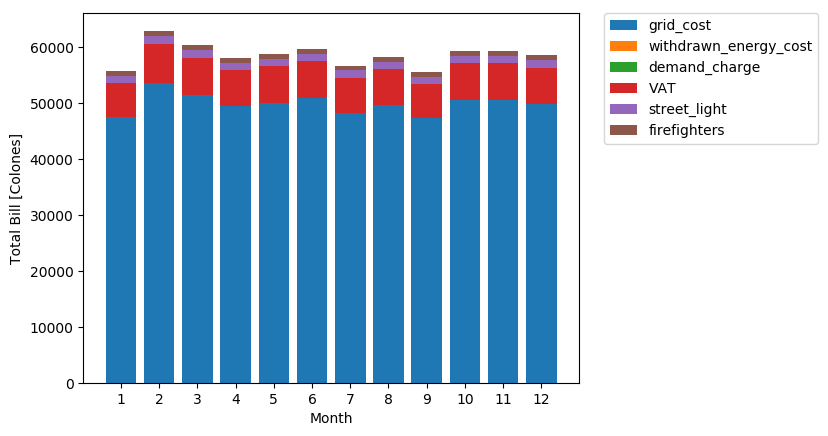

In [6]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

## Residential Case 2: Medium Size PV System, produces some injection into the grid 

In [7]:
PVRes.capacity = 2.0
ts=simulate(residential, PVRes, 3);

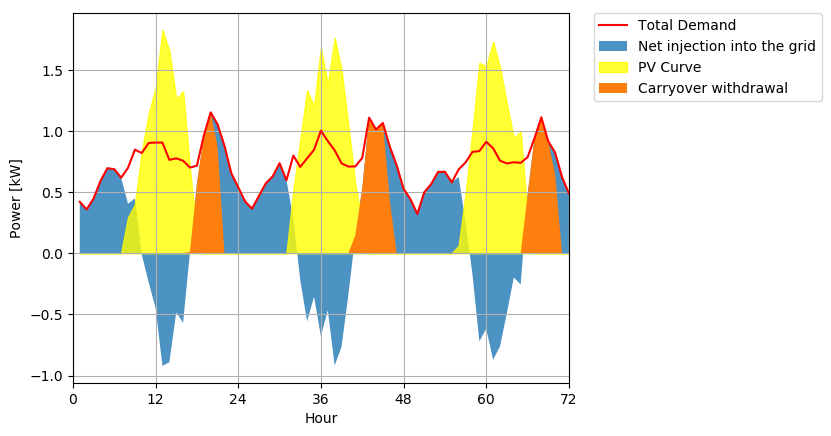

In [8]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
xlim(1,72)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 2

In [9]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 546.73 364.2  | 127.17 127.17 182.53  | 364.2 127.17 178.46 51.29 0.0 
2 545.04 265.72  | 55.34 55.34 279.33  | 629.92 182.51 308.66 126.15 0.0 
3 553.77 302.89  | 63.86 63.86 250.88  | 932.82 246.37 457.08 210.71 0.0 
4 539.57 354.78  | 121.72 121.72 184.79  | 1287.6 368.08 630.92 262.84 0.0 
5 555.1 349.55  | 96.52 96.52 205.54  | 1637.15 464.6 802.2 337.6 0.0 
6 556.42 316.19  | 94.54 94.54 240.23  | 1953.34 559.14 957.14 398.0 0.0 
7 538.72 331.22  | 114.26 114.26 207.5  | 2284.56 673.4 1119.43 446.03 0.0 
8 546.96 340.39  | 96.74 96.74 206.58  | 2624.95 770.14 1286.23 516.09 0.0 
9 536.95 357.45  | 121.2 121.2 179.5  | 2982.4 891.34 1461.37 570.03 0.0 
10 559.01 377.29  | 121.86 121.86 181.71  | 3359.69 1013.2 1646.25 633.05 0.0 
11 558.47 327.12  | 76.9 76.9 231.35  | 3686.81 1090.1 1806.54 716.44 0.0 
12 559.01 337.88  | 

### Billings case residential 2

In [10]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
11522.85 2674.32 0.0 17030.61  | 78106.67 61076.06
20310.26 1163.82 0.0 25664.88  | 77907.11 52242.22
17554.59 1342.94 0.0 22615.06  | 78940.79 56325.74
11665.49 2559.72 0.0 17066.49  | 77258.49 60192.0
13162.86 2029.79 0.0 18229.93  | 79097.41 60867.48
16522.86 1988.12 0.0 22157.92  | 79253.96 57096.04
13352.95 2402.95 0.0 18896.91  | 77158.55 58261.64
13262.95 2034.37 0.0 18353.83  | 78134.53 59780.69
11332.0 2548.88 0.0 16652.42  | 76948.62 60296.2
11471.65 2562.68 0.0 16836.78  | 79560.75 62723.97
15662.66 1617.13 0.0 20700.27  | 79496.65 58796.38
14673.47 1997.44 0.0 19979.77  | 79561.21 59581.44


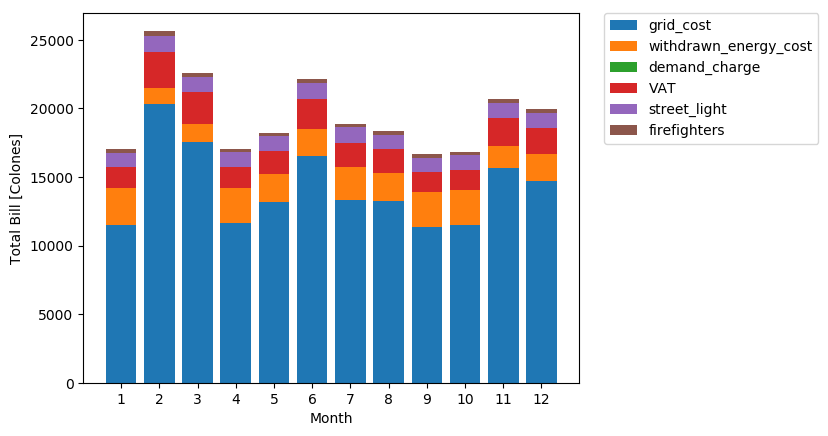

In [11]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

## Residential Case 3: Large PV System that generates multi-day carry over

In [12]:
PVRes.capacity = 4.0
ts=simulate(residential, PVRes, 3);

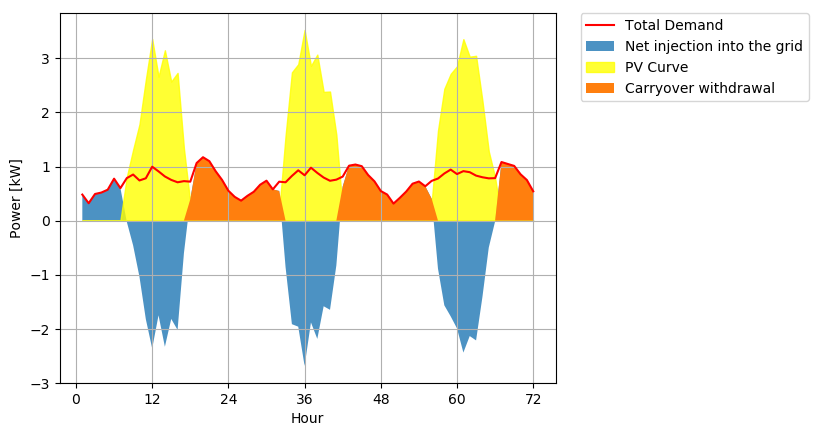

In [13]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

### Energy Balance for case residential 3

In [14]:
ebalance = annual_energy_balance(residential, PVRes, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | global_generation global_withdrawal global_allowance max_surplus carryover 
1 546.53 727.59  | 460.93 279.86 0.0  | 727.59 279.86 356.52 76.66 76.66 
2 547.77 521.3  | 293.64 320.11 0.0  | 1248.89 599.97 611.96 11.98 11.98 
3 553.55 587.74  | 360.59 326.4 0.0  | 1836.63 926.38 899.95 0.0 0.0 
4 540.75 721.95  | 460.45 279.26 0.0  | 2558.58 1205.63 1253.71 48.07 48.07 
5 553.21 656.3  | 392.04 288.95 0.0  | 3214.88 1494.58 1575.29 80.71 80.71 
6 555.3 627.42  | 366.56 294.44 0.0  | 3842.3 1789.02 1882.73 93.71 93.71 
7 538.55 680.42  | 429.63 287.76 0.0  | 4522.72 2076.78 2216.13 139.35 139.35 
8 545.65 723.75  | 460.34 282.24 0.0  | 5246.47 2359.02 2570.77 211.75 211.75 
9 535.73 717.52  | 455.71 273.92 0.0  | 5964.0 2632.94 2922.36 289.42 289.42 
10 558.74 666.79  | 402.68 294.64 0.0  | 6630.79 2927.58 3249.08 321.51 321.51 
11 559.62 647.72  | 379.95 291.85 0.0  | 7278.5 3219.42 3566.47 347.04 347.04 
1

### Billings case residential 3

In [15]:
bills_residential = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_charge", " ", "total_cost", " | ", "counterfactual_cost", " ", "savings")
for m in 1:12
    bills_residential[m] = monthly_bill(ebalance[m], residential, print_output=true)
end

grid_cost withdrawn_energy_cost demand_charge total_cost | counterfactual_cost savings
0.0 5885.56 0.0 6970.88  | 78082.96 71112.08
0.0 6731.88 0.0 7973.27  | 78229.49 70256.22
0.0 6864.26 0.0 8130.06  | 78914.12 70784.06
0.0 5872.76 0.0 6955.73  | 77398.79 70443.06
0.0 6076.56 0.0 7197.1  | 78873.68 71676.58
0.0 6192.08 0.0 7333.93  | 79121.55 71787.62
0.0 6051.59 0.0 7167.53  | 77137.54 69970.0
0.0 5935.52 0.0 7030.05  | 77978.71 70948.66
0.0 5760.58 0.0 6822.86  | 76804.41 69981.55
0.0 6196.2 0.0 7338.81  | 79529.48 72190.67
0.0 6137.52 0.0 7269.31  | 79632.95 72363.64
0.0 6006.96 0.0 7114.67  | 79637.15 72522.48


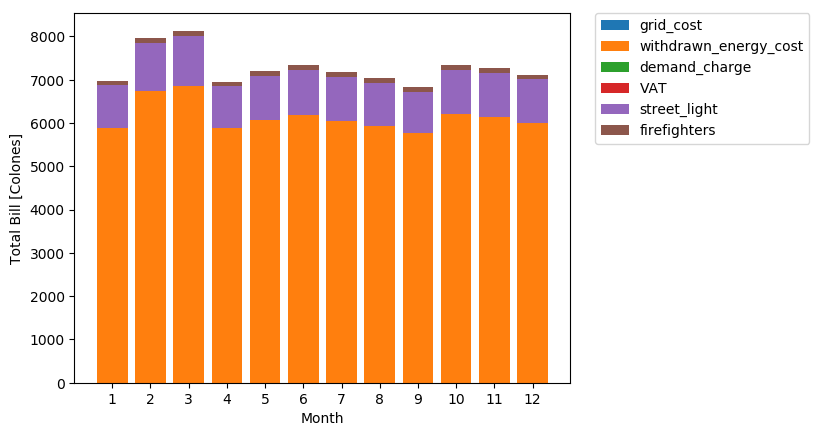

In [16]:
plot_bill(bills_residential, ["grid_cost", "withdrawn_energy_cost", "demand_charge", "VAT", "street_light", "firefighters"]);

# Commercial consumer subject to commercial and small size industrial tariff cases

## Commercial case1: small PV system

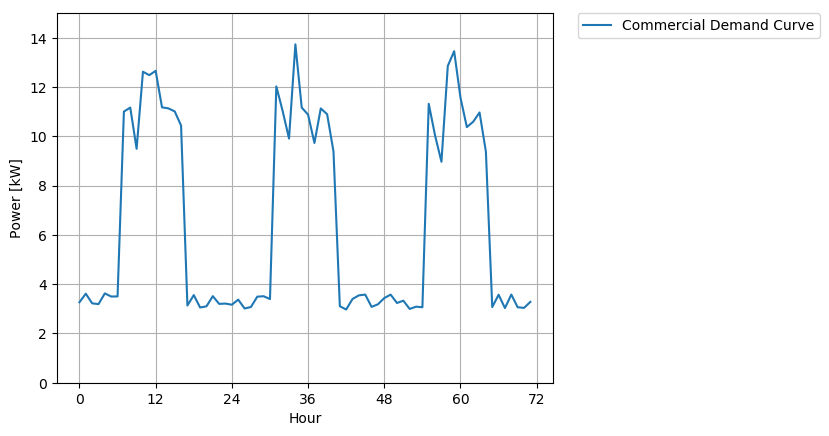

In [17]:
ts=simulate(commercial, PVComInd, 3);
plot(ts["demand_curve"], label = "Commercial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylim(0,15)
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

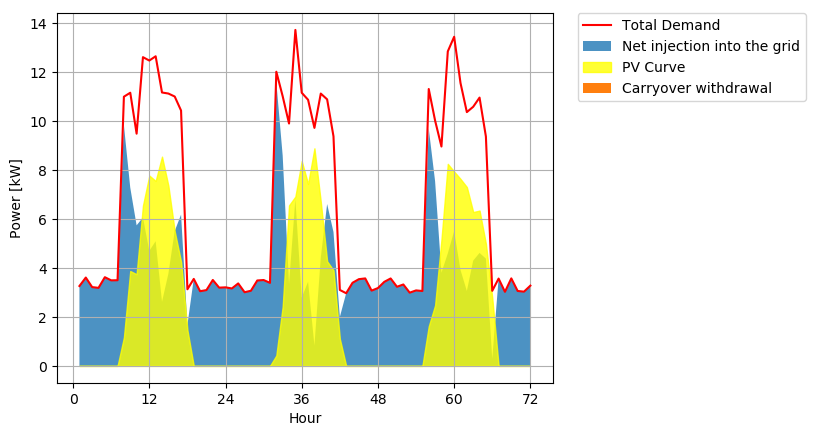

In [18]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [19]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4988.44 1835.87  | 0.0 0.0 3152.57  | 14.71 10.26  | 1835.87 0.0 899.58 899.58 0.0 
2 5115.38 1417.85  | 0.0 0.0 3697.53  | 16.84 12.62  | 3253.72 0.0 1594.32 1594.32 0.0 
3 4863.97 1590.58  | 0.0 0.0 3273.4  | 14.49 10.72  | 4844.3 0.0 2373.71 2373.71 0.0 
4 5022.42 1608.11  | 0.0 0.0 3414.31  | 15.49 10.7  | 6452.41 0.0 3161.68 3161.68 0.0 
5 5354.31 1597.15  | 0.0 0.0 3757.16  | 15.7 11.32  | 8049.56 0.0 3944.28 3944.28 0.0 
6 5210.86 1623.62  | 0.0 0.0 3587.24  | 15.93 11.38  | 9673.17 0.0 4739.85 4739.85 0.0 
7 4969.02 1698.61  | 0.0 0.0 3270.41  | 14.74 10.43  | 11371.79 0.0 5572.18 5572.18 0.0 
8 5020.29 1649.81  | 0.0 0.0 3370.48  | 14.96 10.15  | 13021.6 0.0 6380.58 6380.58 0.0 
9 4925.54 1625.43  | 0.0 0.0 3300.1  | 15.16 10.62  | 14647.03 0.0 7177.04 7177.04 0.0 
10 4746.88 1635.72  | 0.0 0.

In [20]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
202457.93 0.0 103169.21 361772.65  | 320357.71 147880.41 554812.67  | 193040.02
237455.69 0.0 126919.94 431099.38  | 328509.92 169319.21 589213.93  | 158114.55
210217.44 0.0 107738.22 376343.74  | 312364.26 145698.77 542699.87  | 166356.13
219267.15 0.0 107612.62 387078.77  | 322540.04 155704.38 566414.18  | 179335.41
241285.08 0.0 113770.97 420614.45  | 343853.81 157813.98 594457.41  | 173842.96
230372.8 0.0 114437.91 408261.51  | 334641.47 160101.51 586007.7  | 177746.19
210025.5 0.0 104897.1 372852.81  | 319110.46 148204.45 553685.11  | 180832.3
216452.11 0.0 102018.28 377275.16  | 322402.91 150438.3 560206.5  | 182931.34
211932.58 0.0 106770.25 377294.86  | 316317.94 152449.2 555198.92  | 177904.06
199798.54 0.0 89547.21 342944.41  | 304844.56 142268.85 529724.18  | 186779.77
207285.14 0.0 104359.44 368941.51  | 319180.78 1520

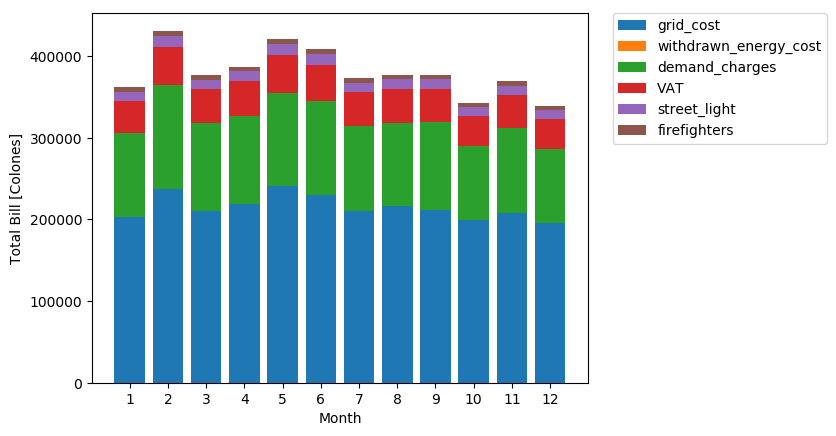

In [21]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

## Commercial case 2: medium PV system

In [22]:
PVComInd.capacity = 21.0
ts=simulate(commercial, PVComInd, 3);

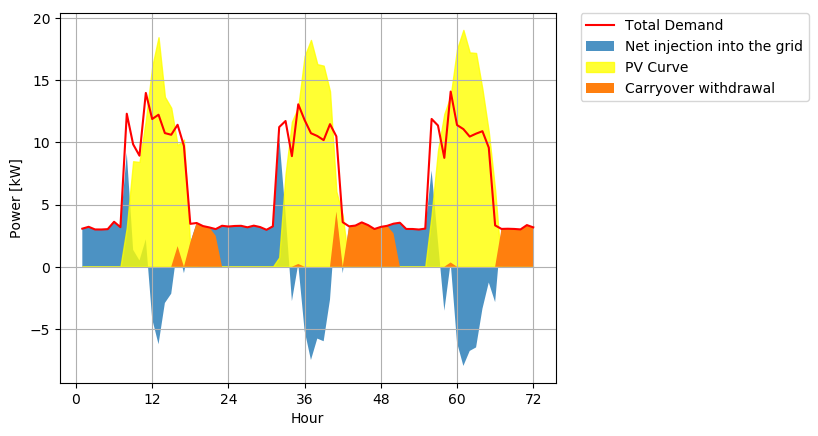

In [23]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [24]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4990.12 4160.79  | 825.77 825.77 829.33  | 14.76 5.02  | 4160.79 825.77 2038.79 1213.02 0.0 
2 5089.8 2803.28  | 187.34 187.34 2286.52  | 16.88 12.64  | 6964.07 1013.11 3412.4 2399.28 0.0 
3 4835.5 3117.31  | 487.63 487.63 1718.18  | 14.45 10.84  | 10081.39 1500.74 4939.88 3439.14 0.0 
4 5010.22 3390.17  | 481.97 481.97 1620.06  | 15.45 8.58  | 13471.55 1982.71 6601.06 4618.35 0.0 
5 5352.17 3778.51  | 559.9 559.9 1573.66  | 15.91 7.75  | 17250.07 2542.61 8452.53 5909.93 0.0 
6 5196.77 3544.46  | 535.48 535.48 1652.31  | 16.01 9.62  | 20794.53 3078.08 10189.32 7111.24 0.0 
7 4951.0 3415.19  | 583.64 583.64 1535.81  | 14.74 10.08  | 24209.72 3661.72 11862.76 8201.04 0.0 
8 4990.74 3617.96  | 523.84 523.84 1372.78  | 14.78 7.36  | 27827.68 4185.56 13635.56 9450.0 0.0 
9 4919.1 3520.78  | 558.79 558.79 13

In [25]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "demand_cost", " ", "total_cost", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost demand_cost total_cost | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
88472.8 17366.02 0.0 125001.87  | 320465.64 148402.0 555540.95  | 430539.07
243925.63 3939.72 0.0 292596.56  | 326866.79 169671.97 587643.41  | 295046.86
183295.57 10254.78 0.0 228508.28  | 310535.55 145282.48 540023.77  | 311515.49
172827.75 10135.92 0.0 216011.28  | 321756.54 155370.07 565088.67  | 349077.39
167877.97 11774.61 0.0 212109.41  | 343716.62 159935.73 596727.21  | 384617.79
176268.29 11261.06 0.0 221405.11  | 333736.62 160963.93 585909.55  | 364504.43
163840.47 12273.96 0.0 207934.98  | 317953.2 148146.93 552227.9  | 344292.92
146448.5 11016.27 0.0 185915.84  | 320505.34 148624.59 555844.1  | 369928.26
149173.08 11751.3 0.0 190002.52  | 315904.48 152493.75 554753.01  | 364750.49
113241.45 12973.79 0.0 149036.67  | 304207.97 142409.63 529120.44  | 380083.78
143221.87 11929.47 0.0 183188.72  | 319231.58 152150.67 558359.01  | 375170.2

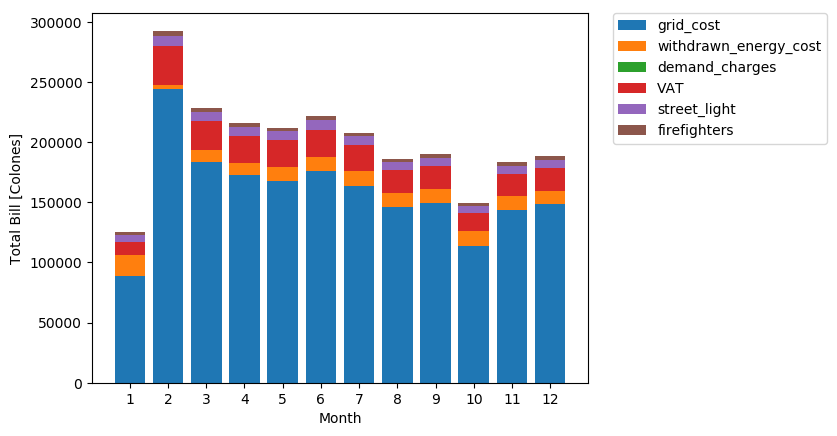

In [26]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"]);

## Commercial case 3: Large PV system

In [27]:
PVComInd.capacity = 32.0
ts=simulate(commercial, PVComInd, 3);

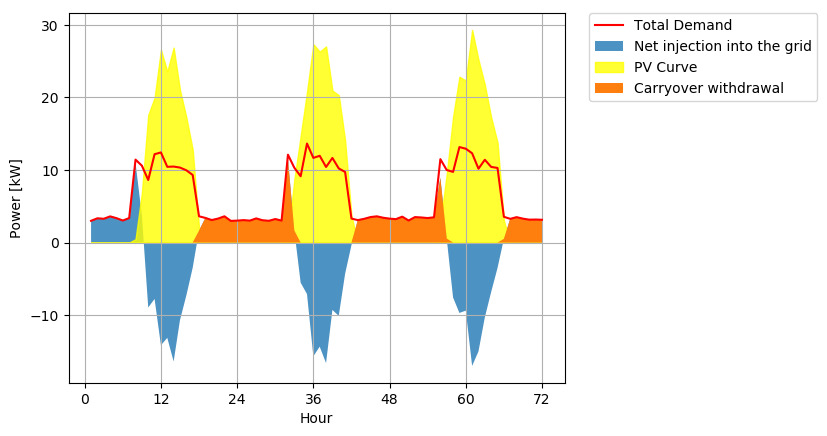

In [28]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [29]:
ebalance = annual_energy_balance(commercial, PVComInd, print_output=true);

month consumer_energy PV_energy  | injection_grid withdrawn_energy grid_energy  | peak_power peak_demand  | global_generation global_withdrawal global_allowance max_surplus carry_over 
1 4989.93 5984.43  | 2604.27 1609.77 0.0  | 14.76 6.06  | 5984.43 1609.77 2932.37 1322.6 994.5 
2 5085.15 4587.74  | 1488.99 1986.41 0.0  | 16.83 12.63  | 10572.17 3596.18 5180.36 1584.19 497.09 
3 4845.52 4716.3  | 1775.51 1904.74 0.0  | 14.49 10.77  | 15288.46 5500.91 7491.35 1990.43 367.86 
4 5021.37 4870.56  | 1626.36 1777.17 0.0  | 15.5 7.76  | 20159.02 7278.09 9877.92 2599.83 217.05 
5 5368.31 5755.73  | 2098.49 1711.07 0.0  | 15.94 6.11  | 25914.75 8989.15 12698.23 3709.07 604.47 
6 5172.27 5740.69  | 2134.28 1565.86 0.0  | 16.02 5.91  | 31655.45 10555.01 15511.17 4956.16 1172.9 
7 4972.12 5542.87  | 2070.43 1499.68 0.0  | 14.62 4.98  | 37198.32 12054.69 18227.18 6172.49 1743.65 
8 5021.06 5029.63  | 1701.24 1692.67 0.0  | 14.8 7.36  | 42227.95 13747.35 20691.7 6944.34 1752.23 
9 4918.12 5195.11  

In [30]:
bills_commercial = Dict()
println("grid_cost"," ","withdrawn_energy_cost"," ", "total_energy_cost", " ", "total_demand_charges", " | ", 
        "counterfactual_energy_cost", " ", "counterfactual_demand_cost", " ", "counterfactual_cost", " ", " | ", "savings")
for m in 1:12
    bills_commercial[m] = monthly_bill(ebalance[m], commercial, print_output=true)
end

grid_cost withdrawn_energy_cost total_energy_cost total_demand_charges | counterfactual_energy_cost counterfactual_demand_cost counterfactual_cost  | savings
0.0 33853.45 0.0 40096.17  | 320453.3 148383.92 555505.36  | 515409.19
0.0 41774.12 0.0 49477.45  | 326568.49 169169.59 586708.33  | 537230.88
0.0 40056.62 0.0 47443.23  | 311179.45 145663.23 541234.76  | 493791.53
0.0 37373.95 0.0 44265.87  | 322472.26 155855.57 566506.18  | 522240.32
0.0 35983.79 0.0 42619.36  | 344753.07 160260.48 598345.83  | 555726.46
0.0 32929.97 0.0 39002.4  | 332162.91 161040.11 584105.13  | 545102.73
0.0 31538.2 0.0 37353.99  | 319309.32 146991.67 552532.52  | 515178.53
0.0 35596.77 0.0 42160.97  | 322452.21 148820.88 558409.77  | 516248.8
0.0 30998.08 0.0 36714.26  | 315841.5 152640.1 554845.22  | 518130.96
0.0 33226.02 0.0 39353.04  | 304664.67 141850.05 529027.35  | 489674.31
0.0 30810.43 0.0 36492.0  | 317636.63 153437.11 557917.82  | 521425.82
0.0 31863.84 0.0 37739.67  | 311360.49 145138.04 540849.7

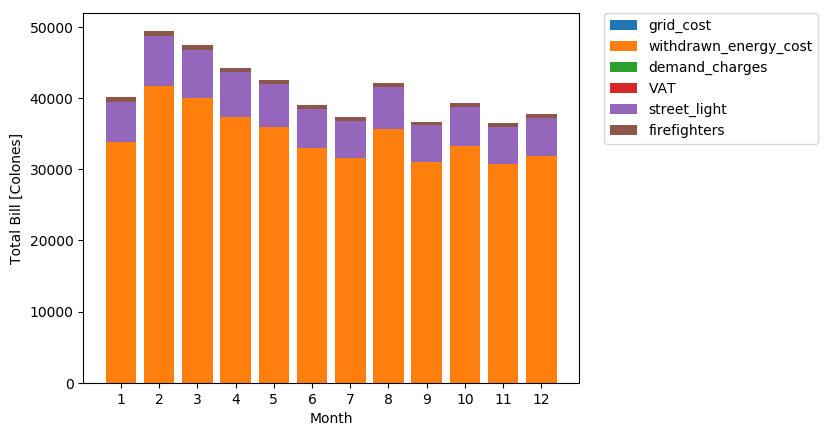

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [31]:
plot_bill(bills_commercial, ["grid_cost", "withdrawn_energy_cost", "demand_charges", "VAT", "street_light", "firefighters"])

# Medium Voltage (TMT) cases, users are medium to large industrial consumers.

## TMT case 1: small PV system

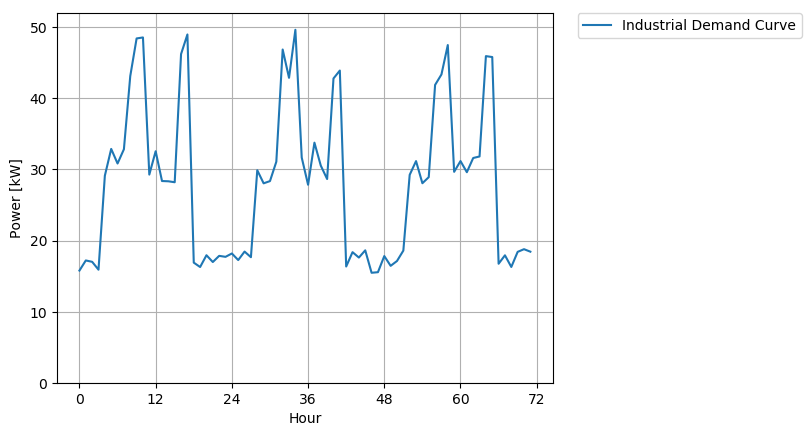

In [32]:
ts=simulate(mediumvoltage, PVTMT, 3);
plot(ts["demand_curve"], label = "Industrial Demand Curve")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ylim(0,52)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

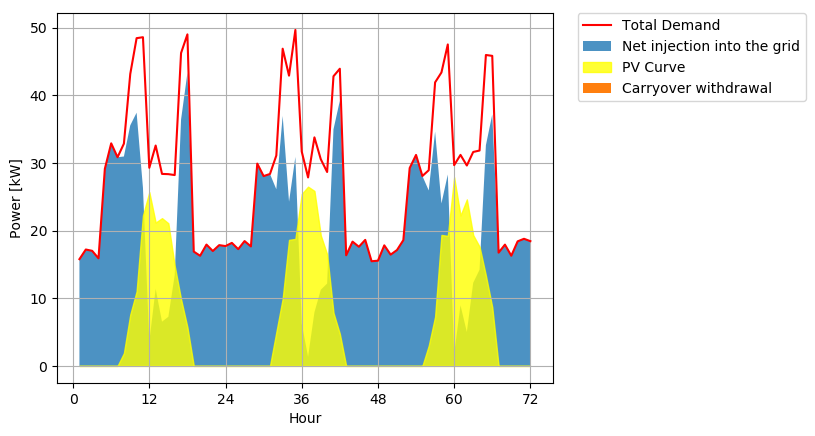

In [33]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [34]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7193.2 8103.15 5708.9  | 5708.01 0.0 0.0  | 4866.16 4722.19 5708.9  | 50.8 50.4 33.86  | 50.64 34.96 33.86  | 5708.01 0.0 2796.92 2796.92 0.0 
2 | 6674.0 7483.01 5303.57  | 3965.97 0.0 0.0  | 4915.31 5275.72 5303.57  | 51.64 51.6 34.37  | 51.64 39.34 34.37  | 9673.98 0.0 4740.25 4740.25 0.0 
3 | 7215.85 8165.8 5694.05  | 4291.41 0.0 0.0  | 5368.23 5722.01 5694.05  | 50.81 50.7 33.26  | 50.81 33.86 33.26  | 13965.38 0.0 6843.04 6843.04 0.0 
4 | 7512.81 8394.36 5932.17  | 5074.38 0.0 0.0  | 5242.07 5590.72 5932.17  | 54.38 54.07 35.97  | 54.26 37.22 35.97  | 19039.77 0.0 9329.49 9329.49 0.0 
5 | 7255.61 8110.29 5732.04  | 53

In [35]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
264816.48 128490.72 111837.44  | 0.0  | 391454.13 220486.72 111837.44  | 483220.31 237389.1 145972.19  | 484817.34 342189.79 145972.19  | 393008.6 
267491.09 143552.44 103896.97  | 0.0  | 363198.81 203612.71 103896.97  | 492775.41 267151.94 148149.31  | 492775.41 350345.42 148149.31  | 288128.86 
292139.21 155695.97 111546.48  | 0.0  | 392686.5 222191.47 111546.48  | 484914.23 229932.07 143381.75  | 484914.23 344286.8 143381.75  | 337966.49 
285273.52 152123.47 116211.21  | 0.0  | 408847.29 228410.56 116211.21  | 517836.0 252745.45 155062.36  | 518970.29 367163.52 155062.36  | 379747.75 
271144.78 137457.0

In [36]:
bills_TMT[1]

Dict{String,Any} with 26 entries:
  "grid_demand_cost_night"            => 1.45972e5
  "grid_demand_cost_peak"             => 4.8322e5
  "Balance"                           => Dict("consumer_energy_valley"=>8103.15…
  "grid_demand_cost_valley"           => 2.37389e5
  "savings"                           => 3.93009e5
  "savings_energy_cost_peak"          => 1.26638e5
  "counterfactual_energy_cost_valley" => 2.20487e5
  "counterfactual_demand_cost_peak"   => 4.84817e5
  "savings_demand_cost_valley"        => 1.04801e5
  "savings_energy_cost_night"         => 0.0
  "grid_energy_cost_night"            => 1.11837e5
  "grid_energy_cost_valley"           => 1.28491e5
  "savings_energy_cost_valley"        => 91996.0
  "counterfactual_energy_cost_peak"   => 3.91454e5
  "VAT"                               => 1.78324e5
  "counterfactual_energy_cost_night"  => 1.11837e5
  "counterfactual_demand_cost_valley" => 3.4219e5
  "counterfactual_cost"               => 2.02076e6
  "firefighters"            

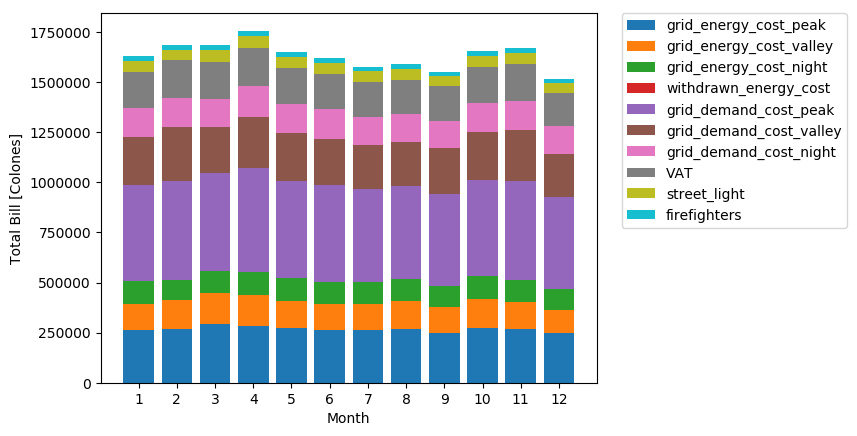

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [37]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_cost_peak",    
        "grid_demand_cost_valley", 
        "grid_demand_cost_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);

## TMT Case2: Medium PV System

In [38]:
PVTMT.capacity = 75
ts=simulate(mediumvoltage, PVTMT, 3);

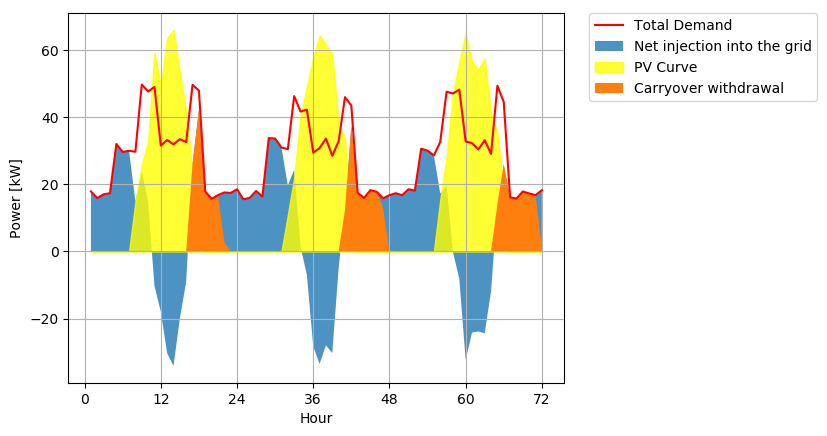

In [39]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [40]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7218.37 8075.45 5730.6  | 14620.26 3995.7 3995.7  | 0.0 1317.64 5086.52  | 50.77 50.74 33.57  | 50.73 33.79 33.57  | 14620.26 3995.7 7163.93 3168.23 0.0 
2 | 6621.81 7462.39 5269.04  | 10627.63 2217.37 2217.37  | 1722.69 1733.87 5269.04  | 51.62 50.68 34.03  | 51.61 34.01 34.03  | 25247.89 6213.07 12371.47 6158.39 0.0 
3 | 7236.97 8077.73 5778.58  | 11450.63 2048.1 2048.1  | 1704.46 2159.61 5778.58  | 50.69 50.66 33.78  | 50.69 33.63 33.78  | 36698.51 8261.17 17982.27 9721.1 0.0 
4 | 7494.0 8387.14 5912.14  | 12334.0 1704.69 1704.69  | 1891.51 1655.64 5912.14  | 54.35 54.31 36.1  | 54.12 36.25 36.1  | 49032.51 9965.86 2402

In [41]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "total_savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | total_savings
0.0 35853.11 99644.97  | 84029.55  | 392823.75 219732.97 112262.55  | 484117.08 229409.5 144720.4  | 484460.66 344552.97 144720.4  | 830564.23 
93749.03 47178.58 103220.48  | 46631.34  | 360358.65 203051.58 103220.48  | 492468.44 230926.58 146685.47  | 492616.23 344149.89 146685.47  | 635813.1 
92756.51 58763.03 113202.41  | 43071.55  | 393835.71 219794.96 113202.41  | 483709.61 228381.35 145616.65  | 483709.61 343948.93 145616.65  | 687946.6 
102936.02 45049.89 115818.77  | 35849.64  | 407823.66 228214.16 115818.77  | 516433.64 246156.13 155608.47  | 518646.98 368735.08 155608.47  | 733936.76 
699.32 4092

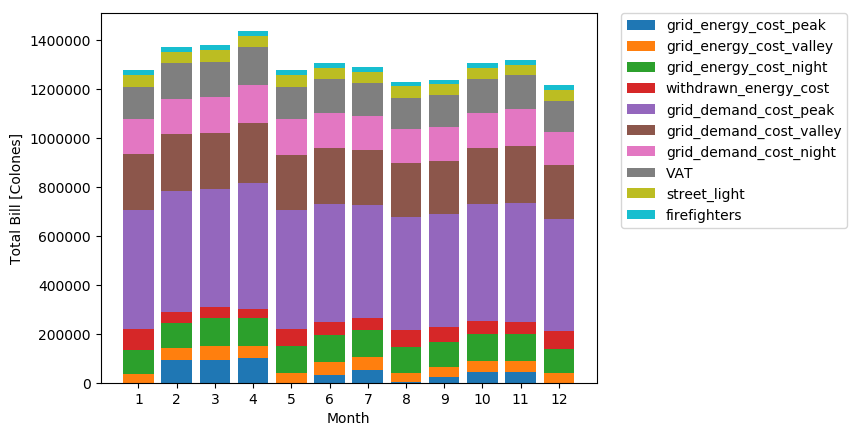

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [42]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_cost_peak",    
        "grid_demand_cost_valley", 
        "grid_demand_cost_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);

## TMT Case 3: Large PV System

In [43]:
PVTMT.capacity = 150
ts=simulate(mediumvoltage, PVTMT, 3);

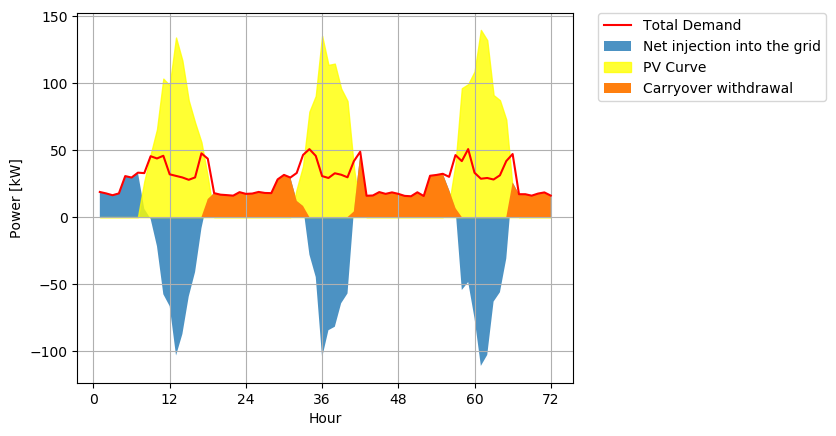

In [44]:
hours = 1:72
fill_between(hours, ts["injection_grid_h"], label = "Net injection into the grid", alpha = 0.8)
fill_between(hours, ts["pv_curve"], label = "PV Curve", alpha = 0.8, color="yellow")
fill_between(hours, ts["withdrawal_h"],  label = "Carryover withdrawal")
plot(hours, ts["demand_curve"], label = "Total Demand", color = "red")
legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
xlabel("Hour")
ylabel("Power [kW]")
grid("on")
xticks([0,12,24,36,48,60,72]);

In [45]:
ebalance = annual_energy_balance(mediumvoltage, PVTMT, print_output=true);

month | consumer_energy_peak consumer_energy_valley consumer_energy_night  | PV_energy injection_grid withdrawn_energy  | grid_energy_peak grid_energy_valley grid_energy_night  | peak_power_peak peak_power_valley peak_power_night  | peak_demand_peak peak_demand_valley peak_demand_night  | global_generation global_withdrawal global_allowance max_surplus carry_over
1 | 7258.53 8107.21 5704.69  | 27288.15 15360.07 9142.35  | 0.0 30.23 0.0  | 50.72 50.66 33.78  | 50.7 33.85 33.78  | 27288.15 9142.35 13371.19 4228.84 4228.84 
2 | 6624.16 7441.62 5256.55  | 17379.5 8426.48 10369.3  | 0.0 0.0 0.0  | 51.56 51.22 33.94  | 51.56 34.01 33.94  | 44667.65 19511.65 21887.15 2375.5 2286.02 
3 | 7319.38 8126.15 5745.6  | 22075.83 11501.61 10616.91  | 0.0 0.0 0.0  | 50.8 50.52 33.87  | 50.8 33.81 33.87  | 66743.49 30128.56 32704.31 2575.75 2575.75 
4 | 7490.79 8453.07 5933.41  | 26288.45 14325.5 9914.31  | 0.0 0.0 0.0  | 54.37 54.38 36.08  | 54.28 35.98 36.08  | 93031.94 40042.87 45585.65 5542.78 5542.

In [46]:
bills_TMT= Dict()
println("grid_energy_cost_peak", " ",    
        "grid_energy_cost_valley", " ",
        "grid_energy_cost_night", " ", 
        " | ",
        "withdrawn_energy_cost", " ",       
        " | ",      
        "counterfactual_energy_cost_peak", " ",
        "counterfactual_energy_cost_valley"," ",
        "counterfactual_energy_cost_night"," ",        
         " | ",
        "grid_demand_cost_peak", " ",    
        "grid_demand_cost_valley", " ",
        "grid_demand_cost_night", " ", 
        " | ",  
        "counterfactual_demand_cost_peak", " ",
        "counterfactual_demand_cost_valley"," ",
        "counterfactual_demand_cost_night"," ",        
         " | ",
        "savings")
for m in 1:12
    bills_TMT[m] = monthly_bill(ebalance[m], mediumvoltage, print_output=true)
end

grid_energy_cost_peak grid_energy_cost_valley grid_energy_cost_night  | withdrawn_energy_cost  | counterfactual_energy_cost_peak counterfactual_energy_cost_valley counterfactual_energy_cost_night  | grid_demand_cost_peak grid_demand_cost_valley grid_demand_cost_night  | counterfactual_demand_cost_peak counterfactual_demand_cost_valley counterfactual_demand_cost_night  | savings
0.0 822.63 0.0  | 192263.61  | 395009.36 220597.12 111754.93  | 483822.13 229816.19 145618.67  | 483973.93 343985.65 145618.67  | 971194.1 
0.0 0.0 0.0  | 218066.46  | 360486.85 202486.37 102975.72  | 492053.46 230894.81 146296.69  | 492053.46 347804.42 146296.69  | 889542.86 
0.0 0.0 0.0  | 223273.52  | 398320.86 221112.54 112556.27  | 484766.46 229558.35 146006.24  | 484766.46 343051.08 146006.24  | 966133.97 
0.0 0.0 0.0  | 208498.01  | 407648.76 230007.95 116235.45  | 517981.41 244280.97 155536.15  | 518849.19 369234.5 155536.15  | 1.01301322e6 
0.0 0.0 0.0  | 207408.97  | 391126.75 221223.48 111225.16  | 48

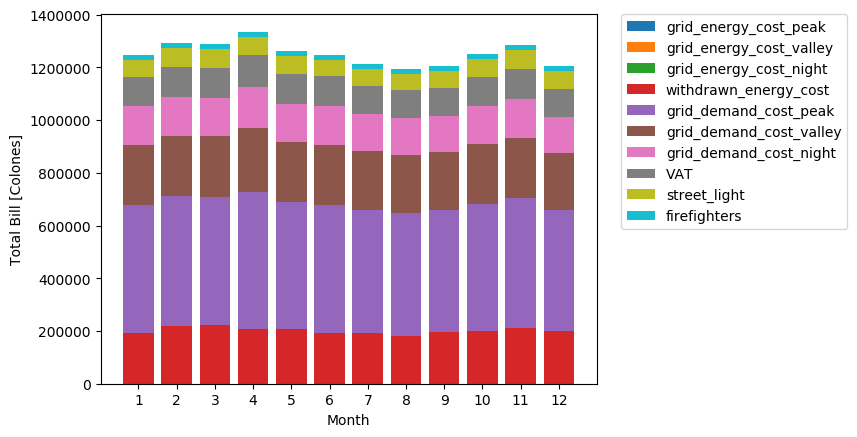

PyObject Text(24.0, 0.5, 'Total Bill [Colones]')

In [47]:
fields = ["grid_energy_cost_peak", 
        "grid_energy_cost_valley",
        "grid_energy_cost_night", 
        "withdrawn_energy_cost",      
        "grid_demand_cost_peak",    
        "grid_demand_cost_valley", 
        "grid_demand_cost_night",
        "VAT", "street_light", "firefighters"]
plot_bill(bills_TMT, fields);